### Importing Libraries 

In [1]:
import pm4py
import pandas as pd
import numpy as np
from colored import fg, bg
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.util import dataframe_utils

## Import heuristics miner algorithm
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
# Import the heuristics net visualisation object
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer

## Import the dfg_discovery algorithm
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
## Import the dfg visualization object
from pm4py.visualization.dfg import visualizer as dfg_visualization


## Import the alpha_miner algorithm
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
## Import the alpha_miner visualisation object
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.petri_net.util import performance_map 


### Preprocessing Dataset

In [8]:
# reading the csv file
df = pd.read_csv("/home/h532671/Documents/FLogs.csv")

# Removing the duplicates
df = df.drop_duplicates()

  
# updating the column value/data
df['FUNCTIONALITY'] = df['FUNCTIONALITY'].astype(str).str.split(":")  

  
for x in range(len(df['FUNCTIONALITY'])):
    df['FUNCTIONALITY'][x] = "".join(df['FUNCTIONALITY'][x][2] + "--->"+ df['FUNCTIONALITY'][x][3])  
    
print(df['FUNCTIONALITY'])
    
# writing into the file
df.to_csv("AllDetails.csv", index=False)

0        RemoteLoggingServiceUtil--->logOnServer
1                           GWT--->executeAction
2                         Login--->executeAction
3                           GWT--->executeAction
4                   LandingPage--->executeAction
                         ...                    
150    WarmupCachesProcessor--->runWithAdminUser
151    WarmupCachesProcessor--->runWithAdminUser
152             AnalysisChartDataCache$2--->call
153             AnalysisChartDataCache$2--->call
154             AnalysisChartDataCache$2--->call
Name: FUNCTIONALITY, Length: 155, dtype: object


In [17]:
df = dataframe_utils.convert_timestamp_columns_in_df(df)
df.head()

,DETAILS,ID,CREATED,USER,SEVERITY,CATEGORY,FUNCTIONALITY,MESSAGE,VIEW ANALYSIS,SCORE
0,Details,5'894'324,2023-03-28 07:53:41+00:00,REFACTORING_UI,Severe,System,RemoteLoggingServiceUtil--->logOnServer,User: UI Refactoring (REFACTORING_UI),,-
1,Details,5'894'323,2023-03-28 07:53:48+00:00,REFACTORING_UI,Finest,Action,GWT--->executeAction,User: UI Refactoring (REFACTORING_UI),,-
2,Details,5'894'322,2023-03-28 07:53:44+00:00,NaN,Finest,Action,Login--->executeAction,IP: 195.138.130.158,,-
3,Details,5'894'321,2023-03-28 07:53:14+00:00,REFACTORING_UI,Finest,Action,GWT--->executeAction,User: UI Refactoring (REFACTORING_UI),,-
4,Details,5'894'320,2023-03-28 07:53:13+00:00,REFACTORING_UI,Finest,Action,LandingPage--->executeAction,User: UI Refactoring (REFACTORING_UI),,-


In [18]:
# Creating new dataframe 'ndf' for process mining
ndf = df[['MESSAGE','CREATED','FUNCTIONALITY']].copy()
ndf.rename(columns = {'MESSAGE':'case:concept:name', 'CREATED':'time:timestamp','FUNCTIONALITY':'concept:name'}, inplace = True)
ndf.head()

,case:concept:name,time:timestamp,concept:name
0,User: UI Refactoring (REFACTORING_UI),2023-03-28 07:53:41+00:00,RemoteLoggingServiceUtil--->logOnServer
1,User: UI Refactoring (REFACTORING_UI),2023-03-28 07:53:48+00:00,GWT--->executeAction
2,IP: 195.138.130.158,2023-03-28 07:53:44+00:00,Login--->executeAction
3,User: UI Refactoring (REFACTORING_UI),2023-03-28 07:53:14+00:00,GWT--->executeAction
4,User: UI Refactoring (REFACTORING_UI),2023-03-28 07:53:13+00:00,LandingPage--->executeAction


## Alpha miner

In [19]:
log = log_converter.apply(ndf)

In [20]:
def alphaMiner(log):
    net, initial_marking, final_marking = alpha_miner.apply(log)
    gviz = pn_visualizer.apply(net, initial_marking, final_marking, variant=pn_visualizer.Variants.FREQUENCY, log=log)
    pn_visualizer.view(gviz)
    

replaying log with TBR, completed variants ::   0%|          | 0/9 [00:00<?, ?it/s]

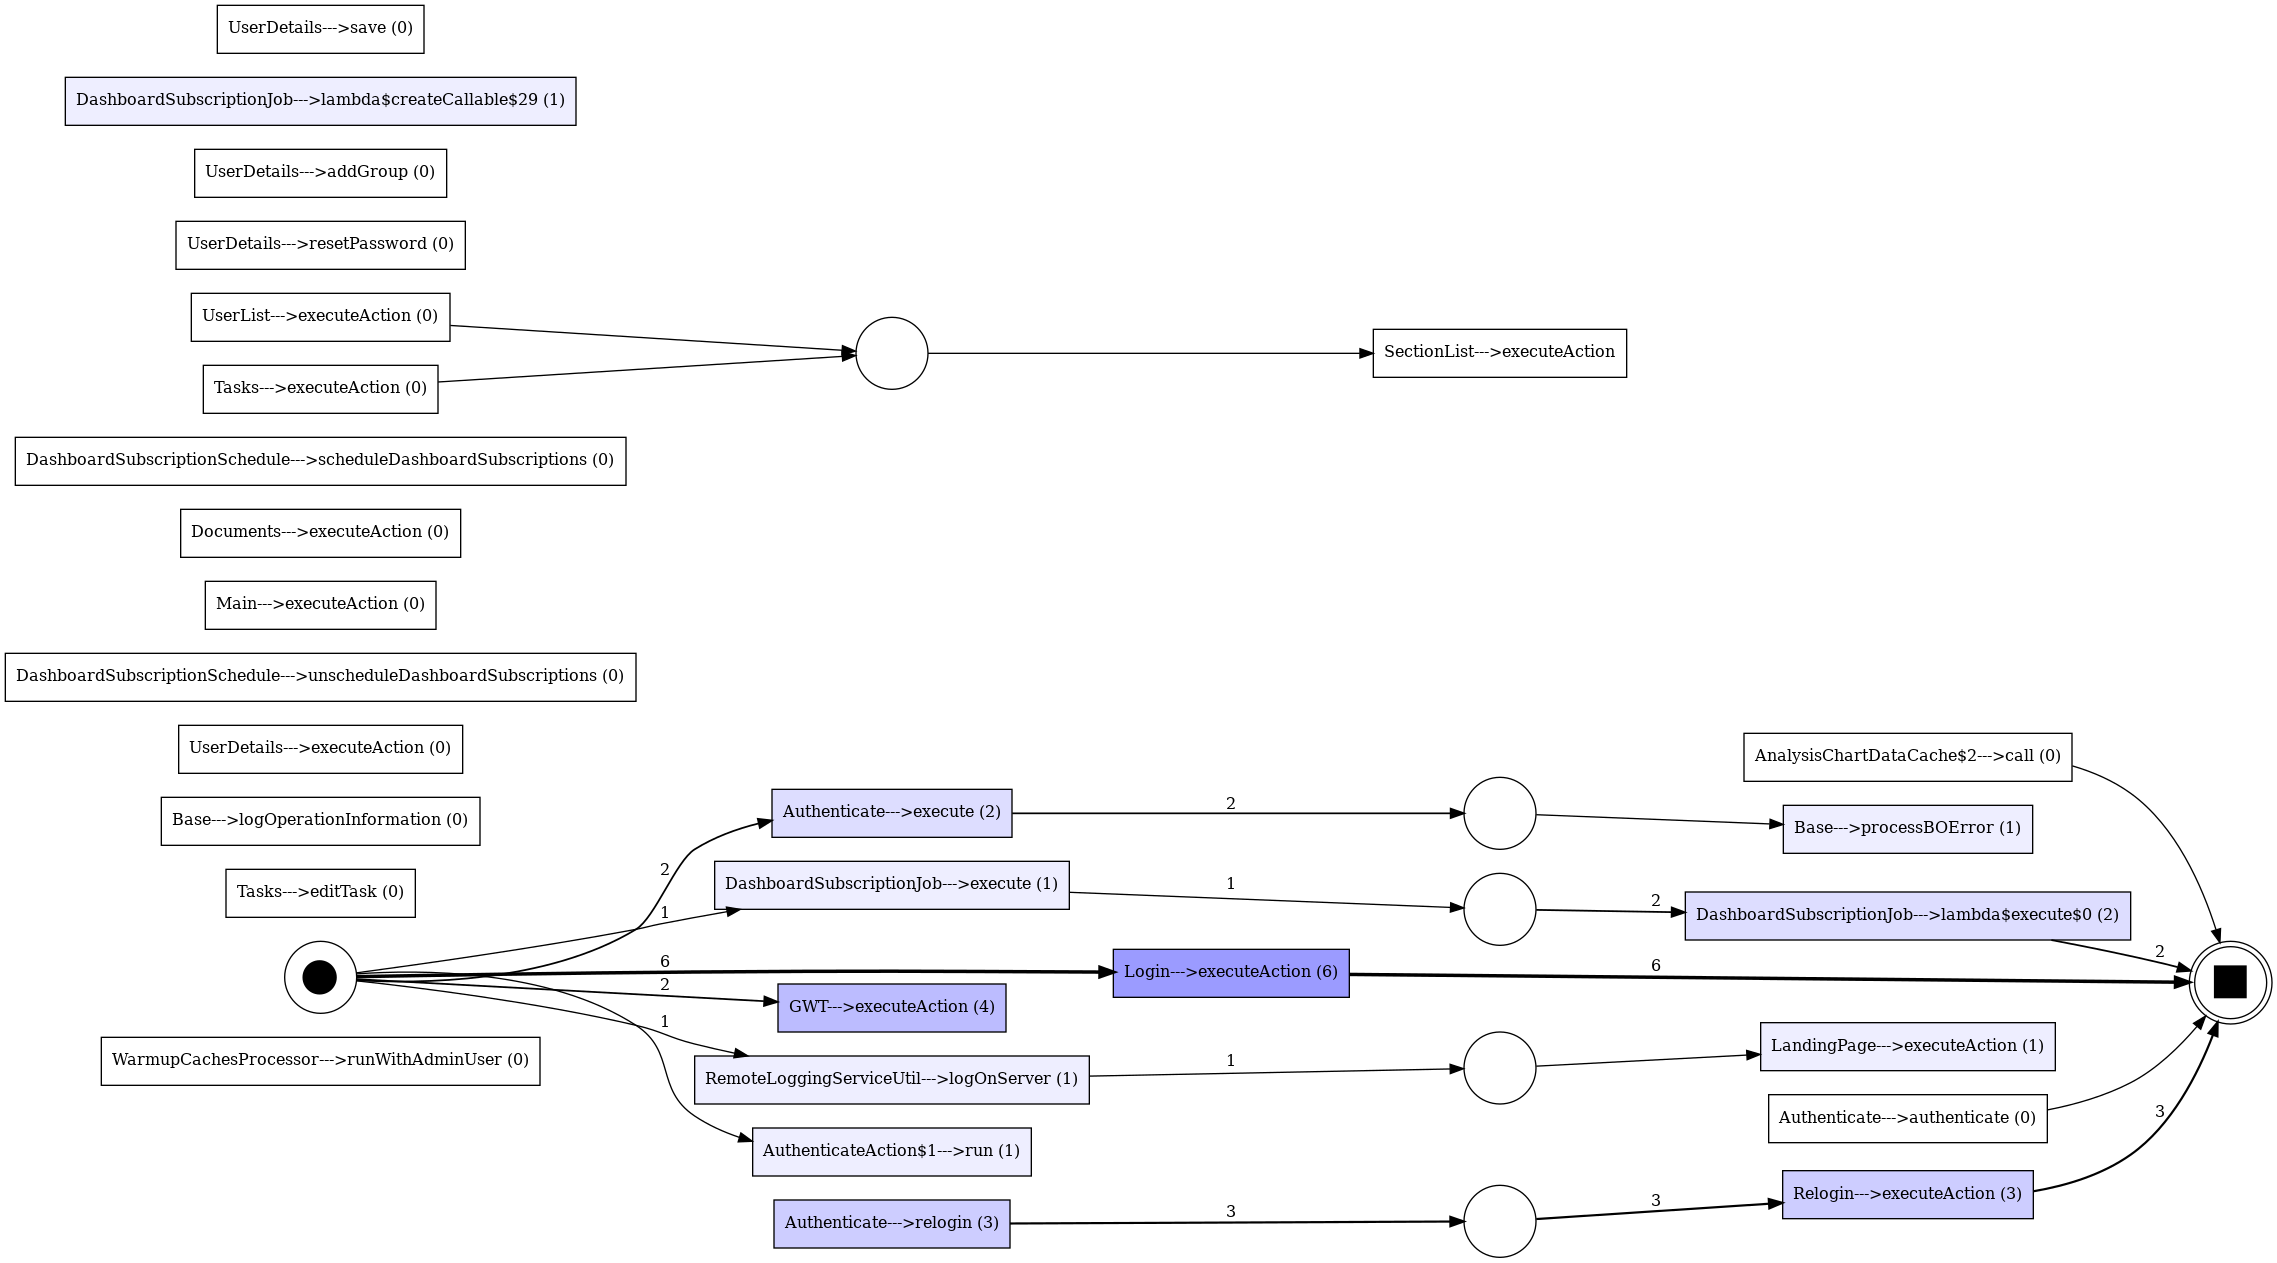

In [21]:
alphaMiner(log)

## Heuristics miner

In [22]:
def heuristicsMiner(log):
    heu_net = heuristics_miner.apply_heu(log)
    # Visualise model
    gviz = hn_visualizer.apply(heu_net)
    hn_visualizer.view(gviz)

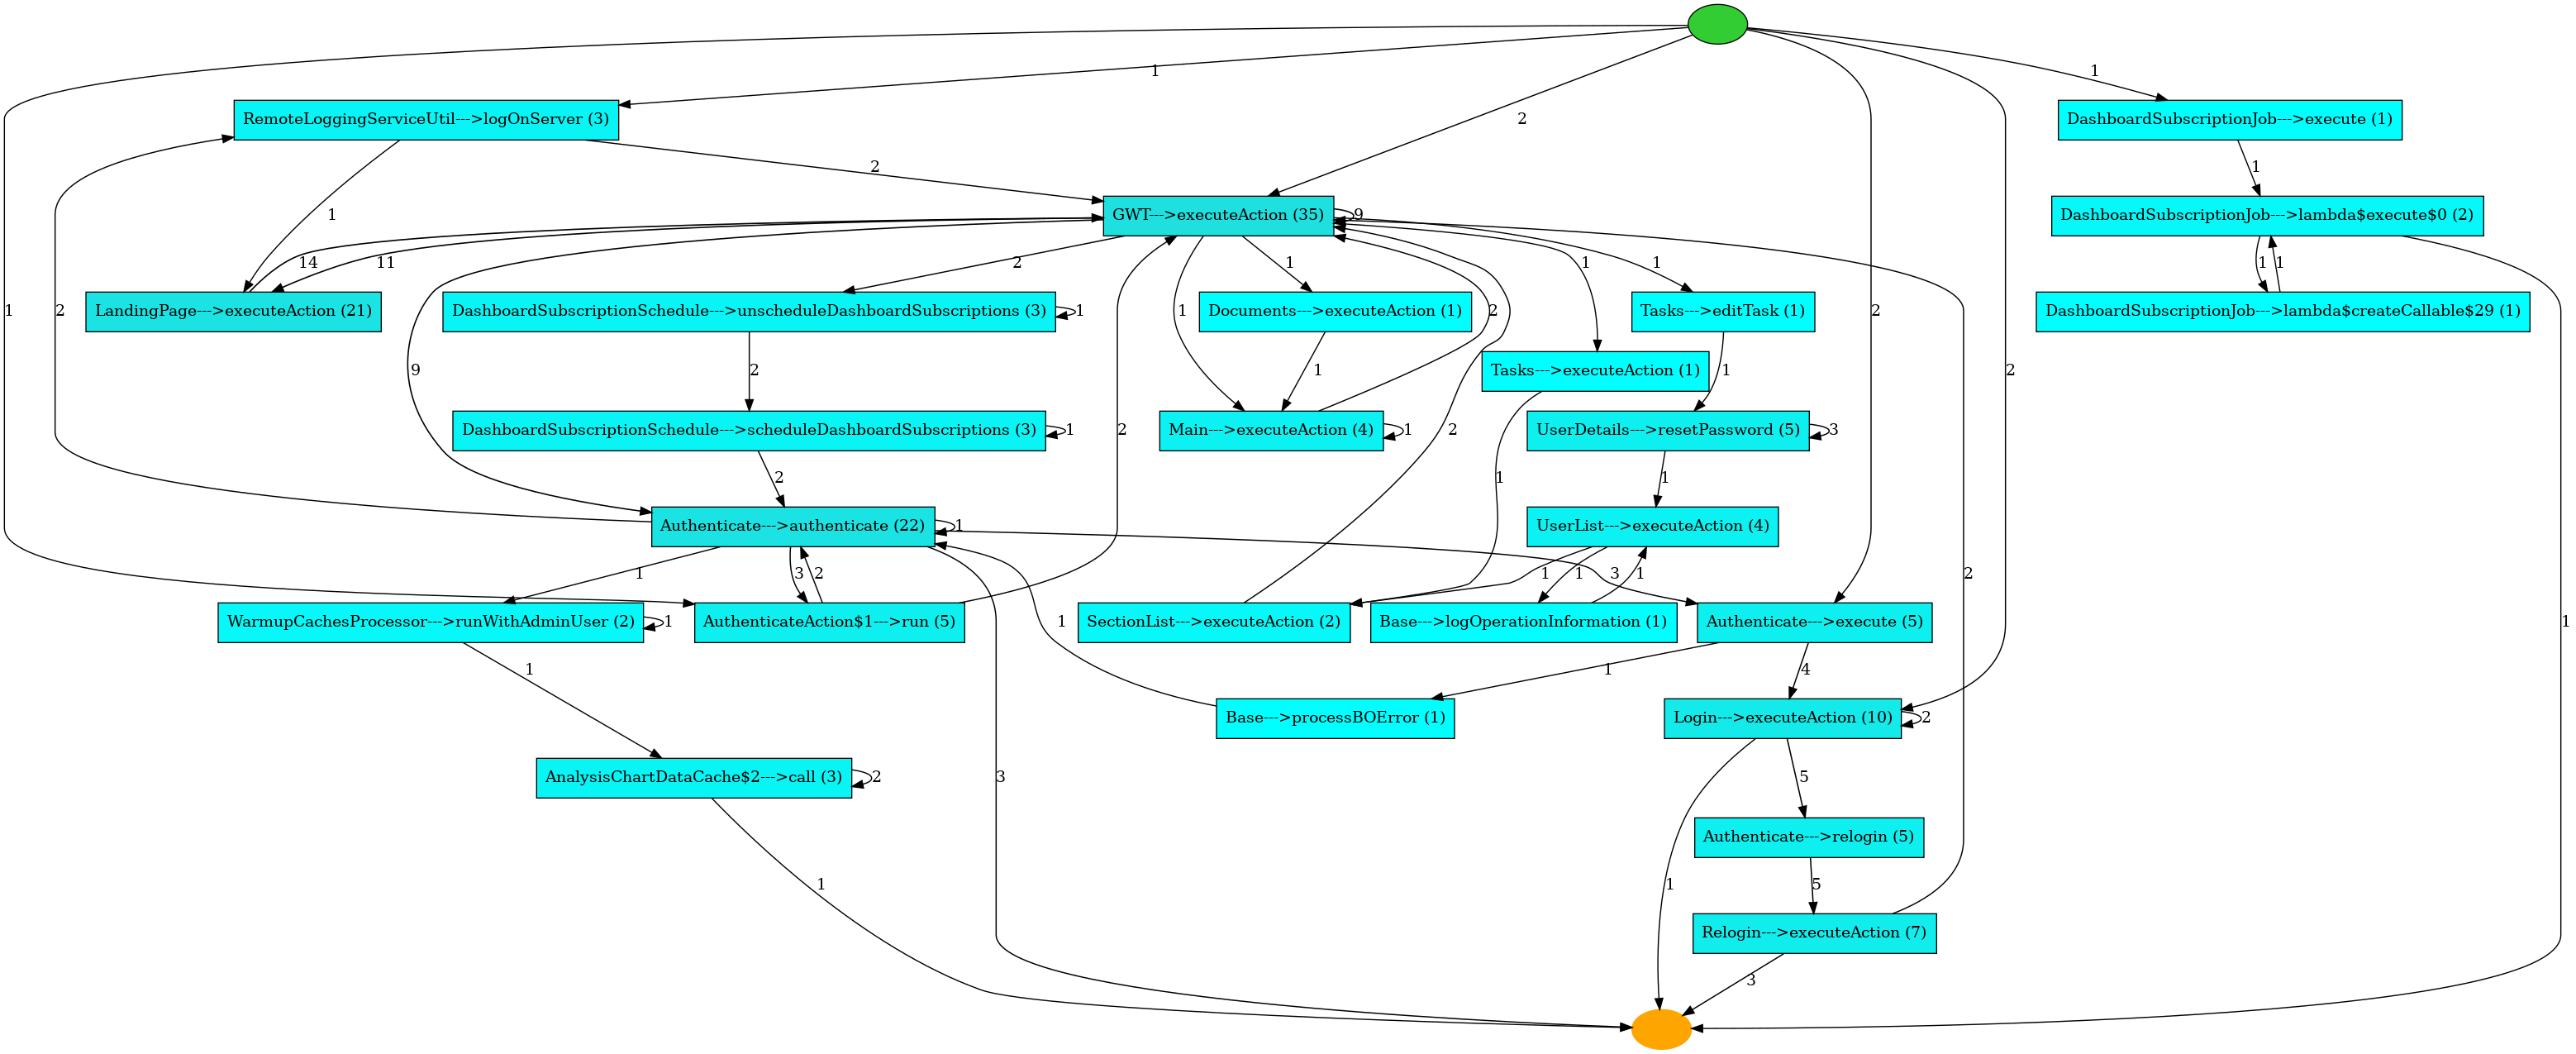

In [23]:
heuristicsMiner(log)

## Dfg_discovery

In [24]:
def dfgDiscovery(log):
    #Create graph from log
    dfg = dfg_discovery.apply(log)
    # Visualise
    gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.FREQUENCY)
    dfg_visualization.view(gviz)

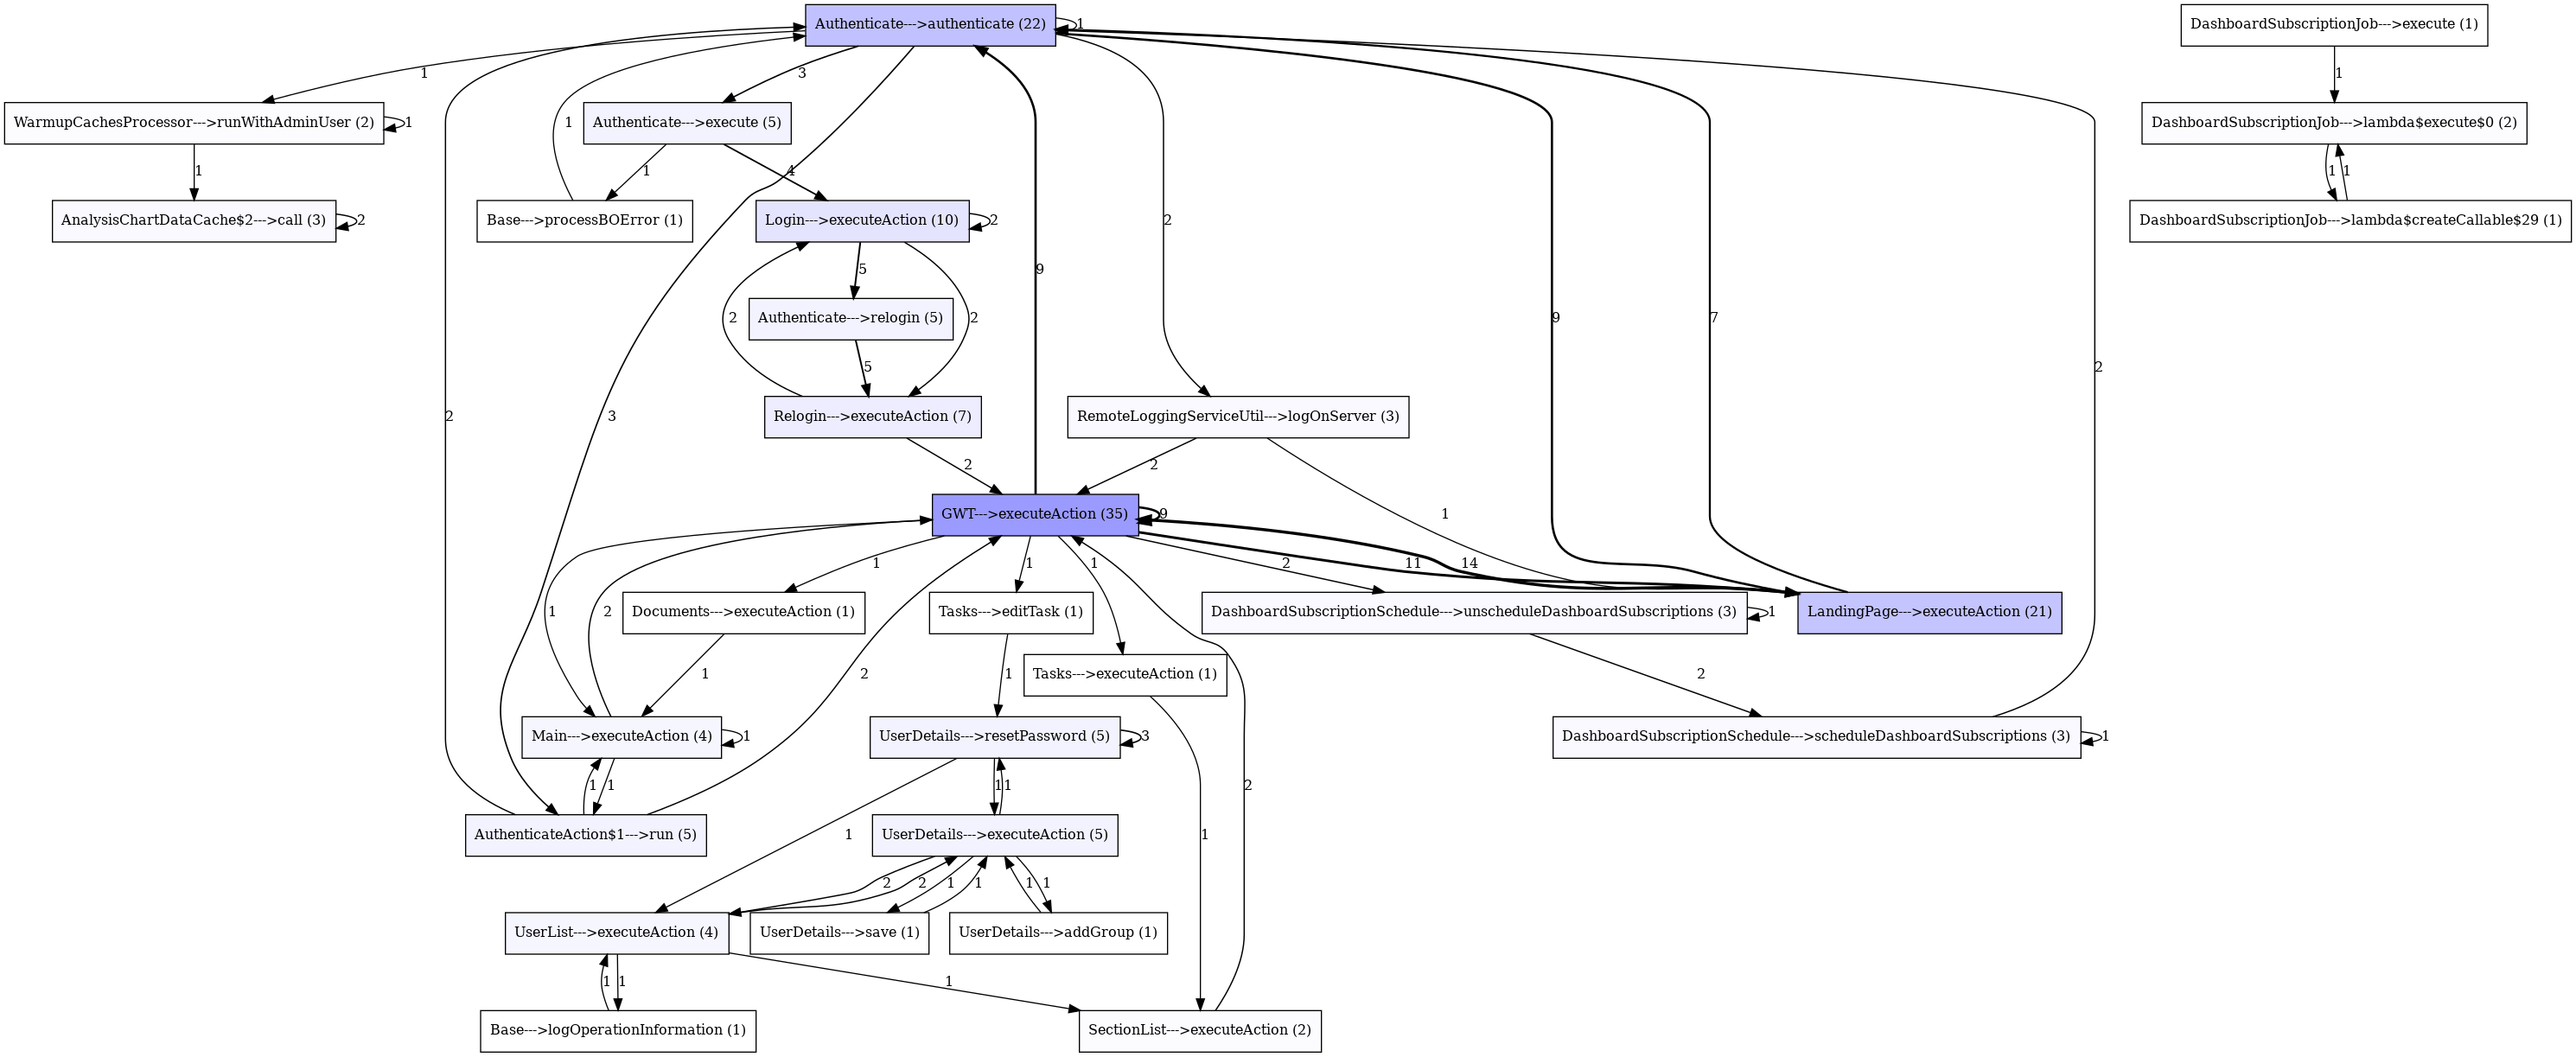

In [25]:
dfgDiscovery(log)

In [26]:
# Creating list to get unique users from the dataset
segment_user = ndf["case:concept:name"].unique()
print(segment_user)
# Removing the null values
segment_user = segment_user[np.logical_not(pd.isna(segment_user))]
print('\nUpdated List :\n\n',segment_user)

['User: UI Refactoring (REFACTORING_UI)' 'IP: 195.138.130.158'
 'IP: 155.190.53.7' nan 'User: Administrator System (ADMIN)'
 'IP: 155.190.53.4' 'IP: 63.143.42.250'
 'User: Refactoring ATLANTIS (REFACTORING_ATLANTIS)'
 'User: user demo (DEMO_AVI_USER)']

Updated List :

 ['User: UI Refactoring (REFACTORING_UI)' 'IP: 195.138.130.158'
 'IP: 155.190.53.7' 'User: Administrator System (ADMIN)'
 'IP: 155.190.53.4' 'IP: 63.143.42.250'
 'User: Refactoring ATLANTIS (REFACTORING_ATLANTIS)'
 'User: user demo (DEMO_AVI_USER)']


   case:concept:name            time:timestamp  \
10               NaN 2023-03-28 07:53:01+00:00   
11               NaN 2023-03-28 07:53:01+00:00   
12               NaN 2023-03-28 07:53:01+00:00   
13               NaN 2023-03-28 07:53:00+00:00   

                                         concept:name  
10                DashboardSubscriptionJob--->execute  
11       DashboardSubscriptionJob--->lambda$execute$0  
12  DashboardSubscriptionJob--->lambda$createCalla...  
13       DashboardSubscriptionJob--->lambda$execute$0  


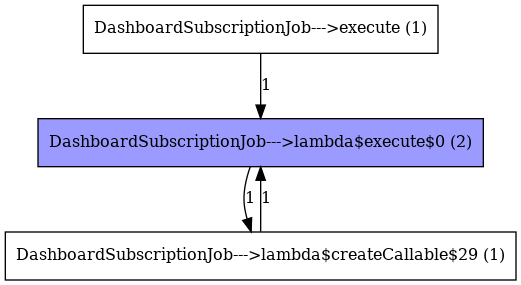

In [27]:
# Process mining the data of 'no user info' 
if ndf['case:concept:name'].isnull().values.any():
    df1 = ndf[ndf['case:concept:name'].isnull()]
    print(df1)
    log = log_converter.apply(df1)
    dfg = dfg_discovery.apply(log)
    # Visualise
    gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.FREQUENCY)
    dfg_visualization.view(gviz)

In [28]:
# grouping by particular dataframe column 
grouped = ndf.groupby(['case:concept:name'])


color = fg('honeydew_2') + bg('black')

PROCESS FLOW OF USER TYPE: User: UI Refactoring (REFACTORING_UI)


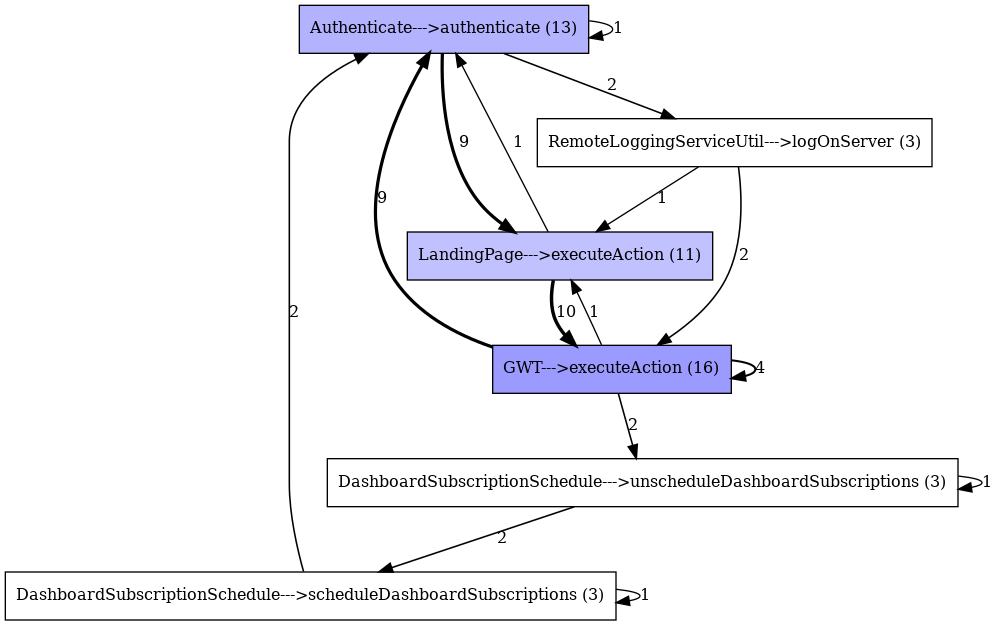

PROCESS FLOW OF USER TYPE: IP: 195.138.130.158


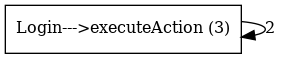

PROCESS FLOW OF USER TYPE: IP: 155.190.53.7


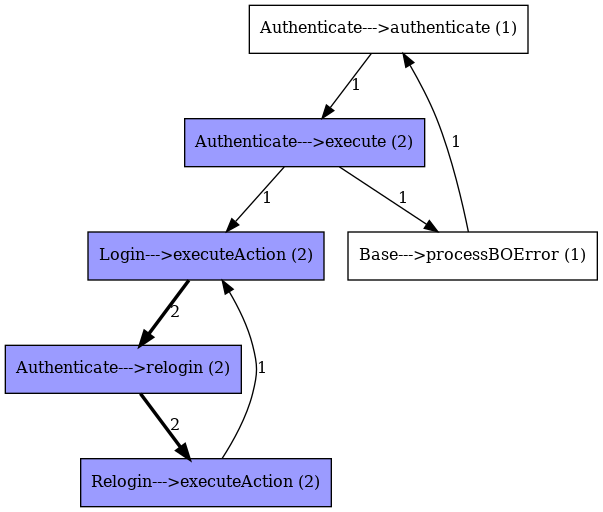

PROCESS FLOW OF USER TYPE: User: Administrator System (ADMIN)


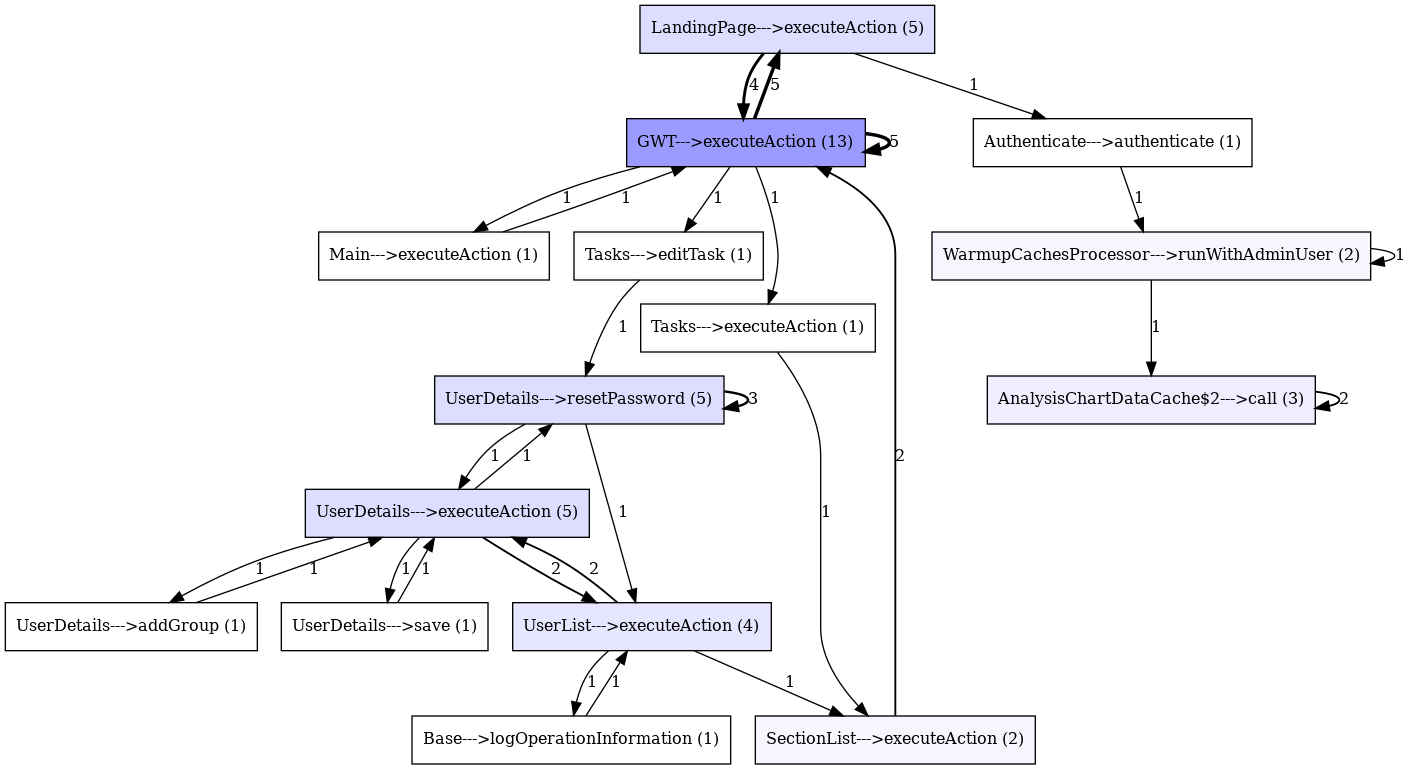

PROCESS FLOW OF USER TYPE: IP: 155.190.53.4


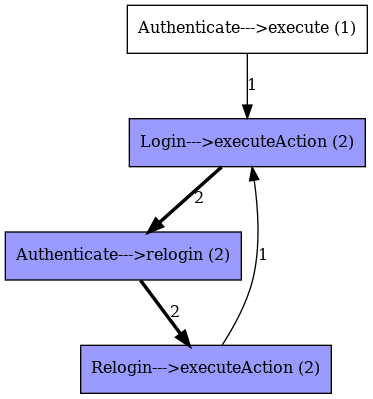

PROCESS FLOW OF USER TYPE: IP: 63.143.42.250


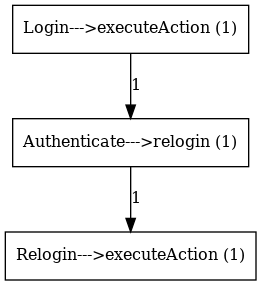

PROCESS FLOW OF USER TYPE: User: Refactoring ATLANTIS (REFACTORING_ATLANTIS)


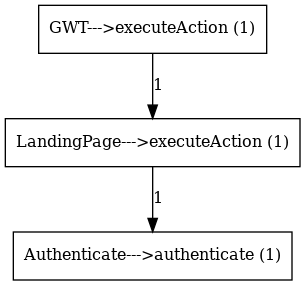

PROCESS FLOW OF USER TYPE: User: user demo (DEMO_AVI_USER)


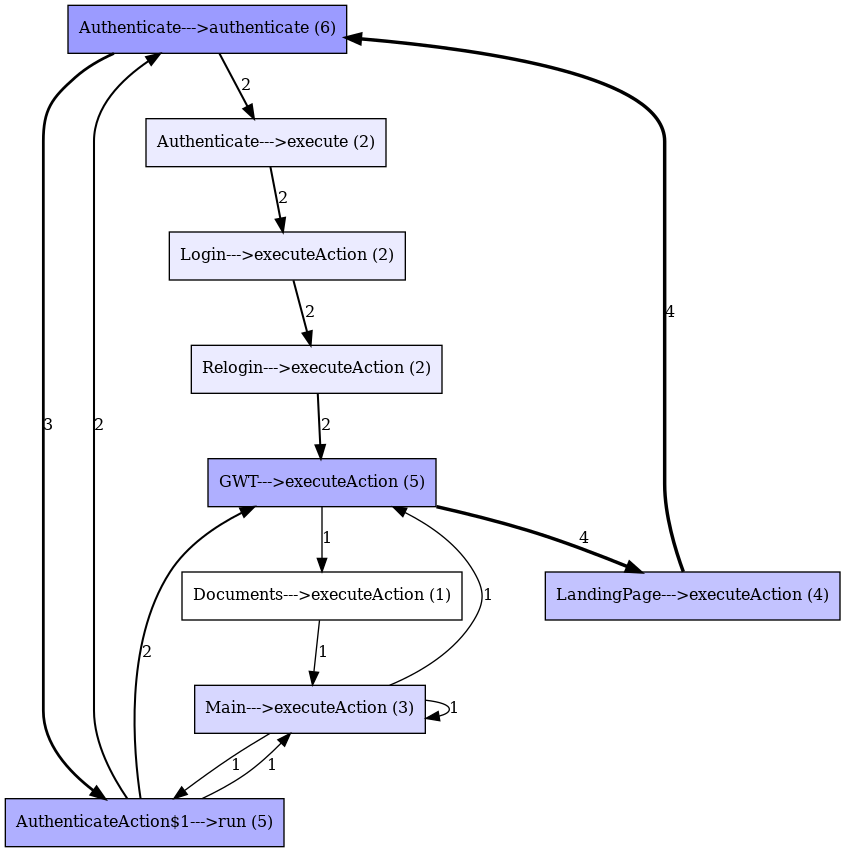

In [29]:
# Segmented process mining 
for x in segment_user :
    df1 = grouped.get_group(x)
#   print(df1)
    log = log_converter.apply(df1)
    print(color + 'PROCESS FLOW OF USER TYPE:', x)
    dfgDiscovery(log)
    